<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682B4;
           font-size:200%;
           font-family:Courier;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
RRHH 
</p>
</div>

(ES)

El análisis de datos para medir el abandono de una empresa implica examinar datos de rotación de empleados para entender las causas y tendencias del abandono. Puede involucrar el uso de estadísticas descriptivas, visualización de datos y modelos de machine learning. Este análisis ayuda a retener y desarrollar el talento, impactando en el éxito empresarial.

(EN)

Data analysis to measure employee turnover in a company involves examining data related to employee churn to understand causes and trends. It may involve the use of descriptive statistics, data visualization, and machine learning models. This analysis helps retain and develop talent, impacting business success.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682B4;
           font-size:200%;
           font-family:Courier;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Libraries
</p>
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682B4;
           font-size:200%;
           font-family:Courier;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Load and Exploration
</p>
</div>

In [3]:
Path = ("./")

In [4]:
df = pd.read_csv( Path + "Data_RRHH.csv", sep=";", index_col= "id", na_values="#N/D")
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

educacion                101
sexo                     199
implicacion               18
satisfaccion_trabajo      76
conciliacion            1011
anos_en_puesto          1238
dtype: int64

- educacion
- sexo
- implicacion
- satisfaccion_trabajo
- conciliacion
- anos_en_puesto

In [7]:
df.describe()

,edad,distancia_casa,empleados,sexo,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
count,1470.000000,1470.000000,1470.0,1271.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,232.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1.0,2.727773,2.063946,6502.931293,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,2.771552,2.187755,4.123129
std,9.135373,8.106864,0.0,0.720788,1.106940,4707.956783,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,0.705244,3.222430,3.568136
min,18.000000,1.000000,1.0,1.000000,1.000000,1009.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,2.000000,1.0,2.000000,1.000000,2911.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,1.0,3.000000,2.000000,4919.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,1.0,3.000000,3.000000,8379.000000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,3.000000,3.000000,7.000000
max,60.000000,29.000000,1.0,4.000000,5.000000,19999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,4.000000,15.000000,17.000000


In [8]:
def graficos_eda_categoricos(cat):
    # Filtramos solo las columnas categóricas
    cat_vars = cat.select_dtypes(include="object")

    # Calculamos el número de filas que necesitamos
    filas = np.ceil(cat_vars.shape[1] / 2).astype(int)

    # Definimos el gráfico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))

    # Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    # Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat_vars):
        cat_vars[variable].value_counts().plot.barh(ax=ax[cada])
        ax[cada].set_title(variable, fontsize=12, fontweight="bold")
        ax[cada].tick_params(labelsize=12)


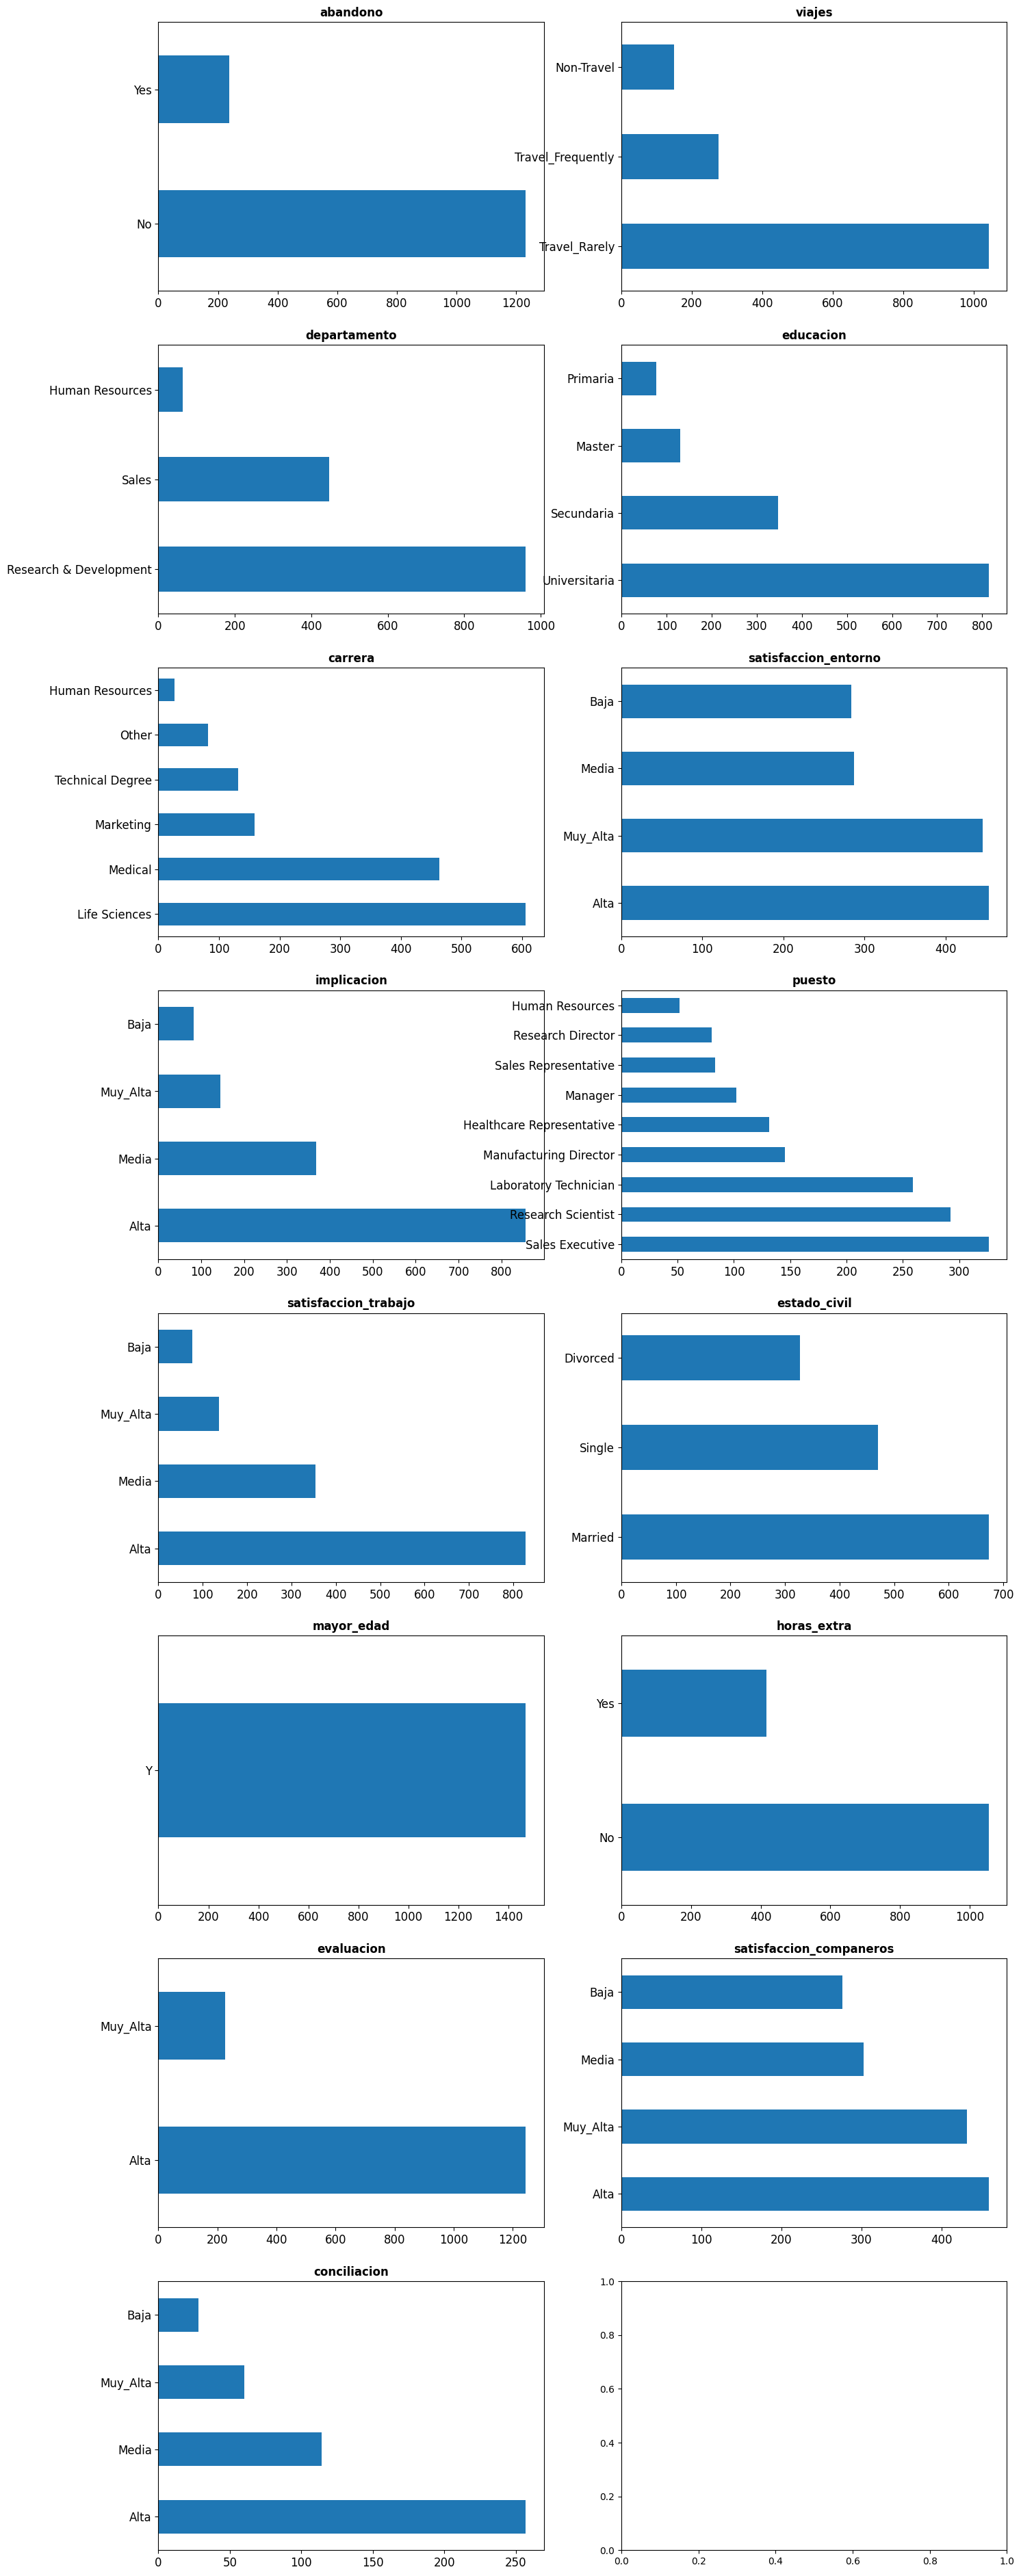

In [9]:
graficos_eda_categoricos(df)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682B4;
           font-size:200%;
           font-family:Courier;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Cleaning
</p>
</div>

In [10]:
df.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'conciliacion',
       'anos_compania', 'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')

- educacion
- sexo
- implicacion
- satisfaccion_trabajo
- conciliacion
- anos_en_puesto

In [11]:
df["sexo"].value_counts()

3.0    739
2.0    328
4.0    130
1.0     74
Name: sexo, dtype: int64

In [12]:
df.drop(columns = ["mayor_edad",
                   "sexo",
                   "horas_quincena",
                   "anos_en_puesto",
                   "conciliacion",
                   "nivel_acciones"
                   
                   ], inplace = True)

In [13]:
df["educacion"] = df["educacion"].fillna("Universitaria")
df["implicacion"] = df["implicacion"].fillna("Alta")
df["satisfaccion_trabajo"] = df["satisfaccion_trabajo"].fillna("Alta")

In [14]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [15]:
df["abandono"] = df.abandono.map({"No":0, "Yes":1})

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682B4;
           font-size:200%;
           font-family:Courier;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Analysis
</p>
</div>

In [16]:
df.head(3)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,implicacion,...,num_empresas_anteriores,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,Alta,...,8,Yes,11,Alta,Baja,8,0,6,0,5
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,Media,...,1,No,23,Muy_Alta,Muy_Alta,10,3,10,1,7
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,Media,...,6,Yes,15,Alta,Media,7,3,0,0,0


In [17]:
df.columns


Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'horas_extra',
       'incremento_salario_porc', 'evaluacion', 'satisfaccion_companeros',
       'anos_experiencia', 'num_formaciones_ult_ano', 'anos_compania',
       'anos_desde_ult_promocion', 'anos_con_manager_actual'],
      dtype='object')

In [18]:
df["abandono"].value_counts(normalize=True)*100

0    83.877551
1    16.122449
Name: abandono, dtype: float64

Posibles Insights:
- departamento *
- num_empresas_anteriores * 
- incremento_salario_porc *
- salario_mes *

- distancia_casa
- educacion
- estado_civil
- horas_extra
- puesto
- satisfaccion_entorno

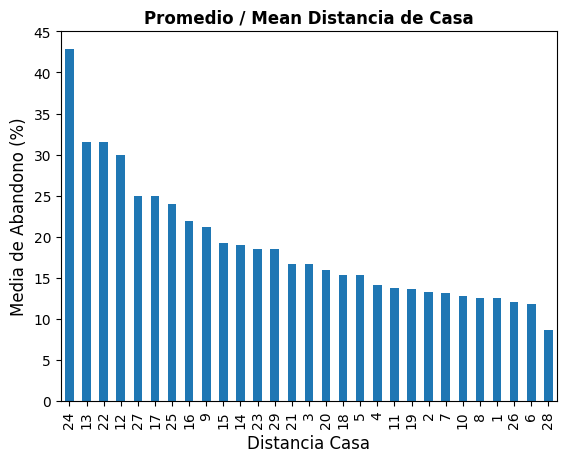

In [19]:
# distancia_casa
temp = df.groupby("distancia_casa")["abandono"].mean() * 100
temp = temp.sort_values(ascending=False)
temp.plot.bar()
plt.title("Promedio / Mean Distancia de Casa", fontsize=12, fontweight="bold")
plt.xlabel("Distancia Casa", fontsize=12)
plt.ylabel("Media de Abandono (%)", fontsize=12)
plt.show()


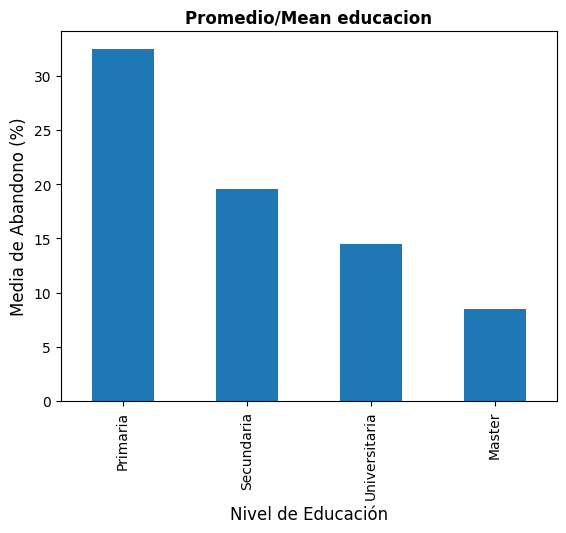

In [20]:
# educacion
temp = df.groupby('educacion')['abandono'].mean() * 100
temp = temp.sort_values(ascending=False)
temp.plot.bar()
plt.title('Promedio/Mean educacion', fontsize=12, fontweight='bold')
plt.xlabel('Nivel de Educación', fontsize=12)
plt.ylabel('Media de Abandono (%)', fontsize=12)
plt.show()


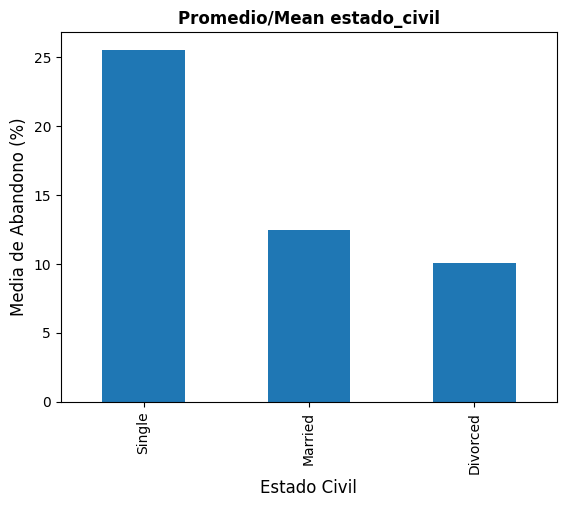

In [21]:
# estado_civil
temp = df.groupby('estado_civil')['abandono'].mean() * 100
temp = temp.sort_values(ascending=False)
temp.plot.bar()
plt.title('Promedio/Mean estado_civil', fontsize=12, fontweight='bold')
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Media de Abandono (%)', fontsize=12)
plt.show()


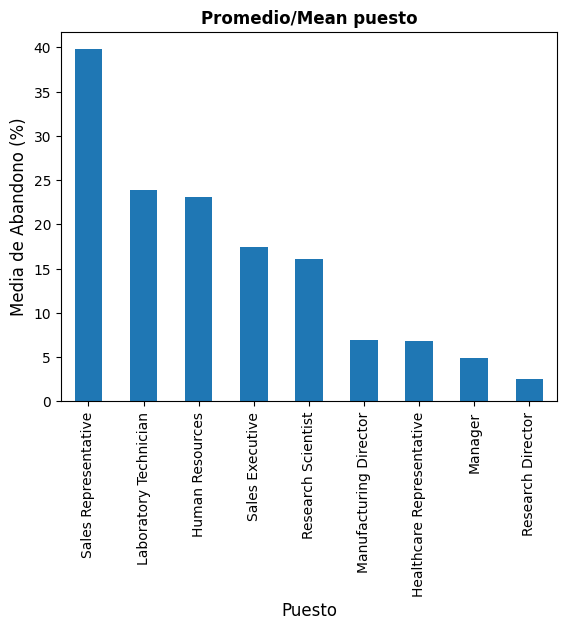

In [22]:
# puesto
temp = df.groupby('puesto')['abandono'].mean() * 100
temp = temp.sort_values(ascending=False)
temp.plot.bar()
plt.title('Promedio/Mean puesto', fontsize=12, fontweight='bold')
plt.xlabel('Puesto', fontsize=12)
plt.ylabel('Media de Abandono (%)', fontsize=12)
plt.show()


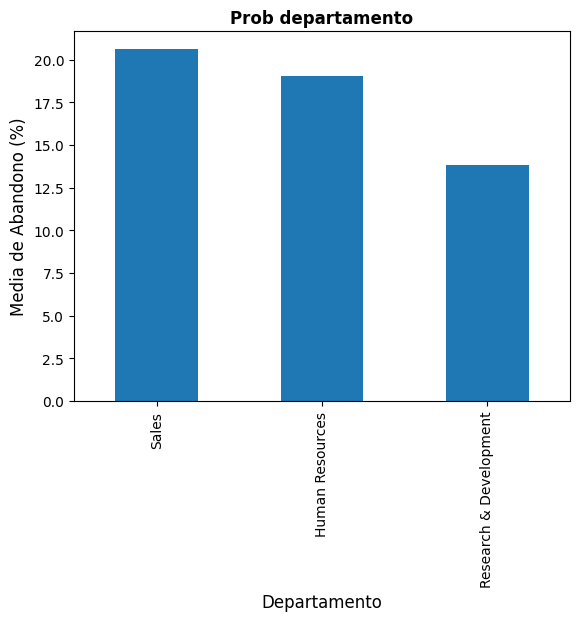

In [23]:
# puesto
temp = df.groupby('departamento')['abandono'].mean() * 100
temp = temp.sort_values(ascending=False)
temp.plot.bar()
plt.title('Prob departamento', fontsize=12, fontweight='bold')
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Media de Abandono (%)', fontsize=12)
plt.show()


In [24]:
coste_horas_extrass = df[(df["abandono"]==1) & (df["departamento"]=="Research & Development")]["empleados"].count()
coste_horas_extrass # MARIA

133

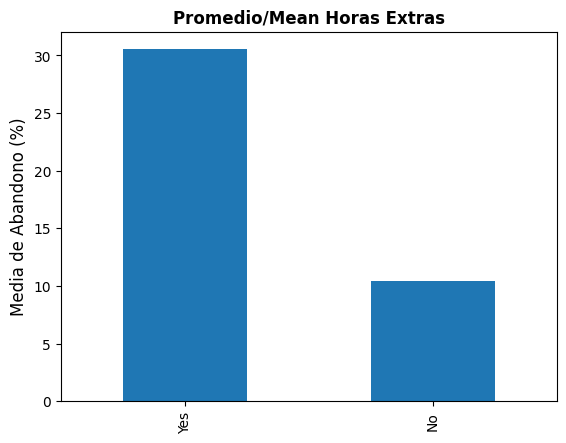

In [25]:
# horas_extra
temp = df.groupby("horas_extra")['abandono'].mean() * 100
temp = temp.sort_values(ascending=False)
temp.plot.bar()
plt.title('Promedio/Mean Horas Extras', fontsize=12, fontweight='bold')
plt.xlabel("")
plt.ylabel('Media de Abandono (%)', fontsize=12)
plt.show()


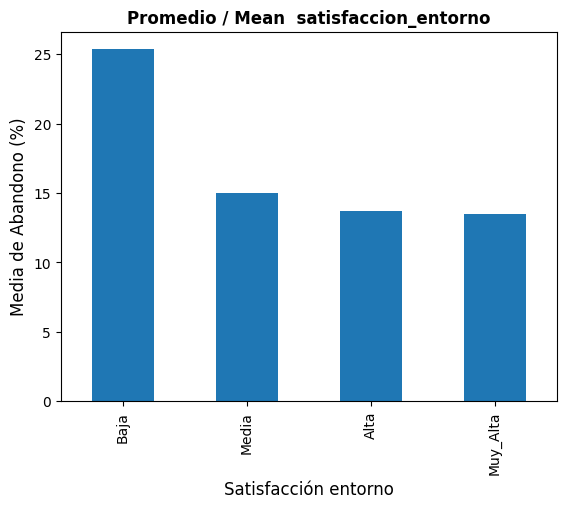

In [26]:
# satisfaccion_entorno
temp = df.groupby('satisfaccion_entorno')['abandono'].mean() * 100
temp = temp.sort_values(ascending=False)
temp.plot.bar()
plt.title('Promedio / Mean  satisfaccion_entorno', fontsize=12, fontweight='bold')
plt.xlabel('Satisfacción entorno', fontsize=12)
plt.ylabel('Media de Abandono (%)', fontsize=12)
plt.show()


- distancia_casa - None
- educacion - Primaria
- estado_civil - Single
- horas_extra - Yes
- puesto - Sales Representitive
- satisfaccion_entorno - Baja

- (ES) Un artículo del Center for American Progress, que cita 11 trabajos de investigación publicados durante un período de 15 años, determinó que el costo económico promedio para una empresa de perder un empleado  es de 21,4% del costo de un año de salario. (Page2 - Figure1)

- (EN) An article from the Center for American Progress, citing 11 research studies published over a 15-year period, determined that the average economic cost for a company to lose an employee is 21,4% of the cost of one year's salary.(Page2 - Figure1)

- https://www.americanprogress.org/wp-content/uploads/2012/11/CostofTurnover.pdf

In [27]:
df.head(2)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,implicacion,...,num_empresas_anteriores,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,Alta,...,8,Yes,11,Alta,Baja,8,0,6,0,5
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,Media,...,1,No,23,Muy_Alta,Muy_Alta,10,3,10,1,7


In [28]:
df["salario_anual"] = df["salario_mes"] *12

In [29]:
df["salario_anual"].isnull().sum()

0

In [30]:
df["coste_abandono"] = df["salario_anual"] * 0.214

In [31]:
# Coste Total
coste_total_abandono = df[df["abandono"]==1]["coste_abandono"].sum().round(2)
print(f"Impacto económico por abandono / Economic impact of abandonment: {coste_total_abandono} €/$")
# Entorno Laboral
coste_satisfaccion_baja = df[(df["abandono"]==1) & (df["satisfaccion_entorno"]=="Baja")]["coste_abandono"].sum().round(2)
print(f"Impacto económico por mal ambiente laboral / Economic impact of a hostile work environment: {coste_satisfaccion_baja} €/$")
# Horas Extras
coste_horas_extras = df[(df["abandono"]==1) & (df["horas_extra"]=="Yes")]["coste_abandono"].sum().round(2)
print(f"Impacto económico por horas extras / Economic impact of overtime hours: {coste_horas_extras} €/$")
# Puesto
coste_puesto = df[(df["abandono"]==1) &  (df["puesto"]=="Sales Representative")]["coste_abandono"].sum().round(2)
print(f"Impacto económico por puesto laboral / Economic impact of job position: {coste_puesto} €/$")

Impacto económico por abandono / Economic impact of abandonment: 2913501.29 €/$
Impacto económico por mal ambiente laboral / Economic impact of a hostile work environment: 958968.24 €/$
Impacto económico por horas extras / Economic impact of overtime hours: 1529541.89 €/$
Impacto económico por puesto laboral / Economic impact of job position: 200396.45 €/$


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682B4;
           font-size:200%;
           font-family:Courier;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Pre - Machine Learning
</p>
</div>

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


1. Interpretación y explicabilidad
2. Manejo de datos categóricos
3. Flexibilidad y capacidad de manejar relaciones no lineales
4. Capacidad de manejar datos desequilibrados

In [33]:
df_ohe = df.copy()

In [34]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   implicacion               1470 non-null   object 
 10  nivel_laboral             1470 non-null   int64  
 11  puesto                    1470 non-null   object 
 12  satisfaccion_trabajo      1470 non-null   object 
 13  estado_civil              1470 non-null   object 
 14  salario_

In [35]:
#Categóricas
cat = df_ohe.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse_output = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [36]:
cat_ohe.head()

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [37]:
# Col Number
num = df.select_dtypes('number').reset_index(drop = True)
# Unir Col
df_ohe = pd.concat([cat_ohe,num], axis = 1)
df_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,salario_mes,num_empresas_anteriores,incremento_salario_porc,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,coste_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,5993,8,11,8,0,6,0,5,71916,15390.024
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,5130,1,23,10,3,10,1,7,61560,13173.840
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2090,6,15,7,3,0,0,0,25080,5367.120
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2909,1,11,8,3,8,3,0,34908,7470.312
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3468,9,12,6,3,2,2,2,41616,8905.824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2571,4,17,17,3,5,0,3,30852,6602.328
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,9991,4,15,9,5,7,1,7,119892,25656.888
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,6142,1,20,6,0,6,0,3,73704,15772.656
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5390,2,14,17,3,9,0,8,64680,13841.520


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4682B4;
           font-size:200%;
           font-family:Courier;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Machine Learning
</p>
</div>

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [39]:
df_ml = df_ohe.copy()

In [40]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 63 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   viajes_Non-Travel                    1470 non-null   float64
 1   viajes_Travel_Frequently             1470 non-null   float64
 2   viajes_Travel_Rarely                 1470 non-null   float64
 3   departamento_Human Resources         1470 non-null   float64
 4   departamento_Research & Development  1470 non-null   float64
 5   departamento_Sales                   1470 non-null   float64
 6   educacion_Master                     1470 non-null   float64
 7   educacion_Primaria                   1470 non-null   float64
 8   educacion_Secundaria                 1470 non-null   float64
 9   educacion_Universitaria              1470 non-null   float64
 10  carrera_Human Resources              1470 non-null   float64
 11  carrera_Life Sciences         

In [41]:
df_ml.describe()

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,salario_mes,num_empresas_anteriores,incremento_salario_porc,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,coste_abandono
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.102041,0.188435,0.709524,0.042857,0.653741,0.303401,0.088435,0.052381,0.236735,0.622449,...,6502.931293,2.693197,15.209524,11.279592,2.799320,7.008163,2.187755,4.123129,78035.175510,16699.527559
std,0.302805,0.391193,0.454137,0.202604,0.475939,0.459884,0.284024,0.222870,0.425223,0.484939,...,4707.956783,2.498009,3.659938,7.780782,1.289271,6.126525,3.222430,3.568136,56495.481397,12090.033019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12108.000000,2591.112000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2911.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000,34932.000000,7475.448000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,4919.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000,59028.000000,12631.992000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,8379.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000,100548.000000,21517.272000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000,239988.000000,51357.432000


In [42]:
# Col Target
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

# Split Data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

# Instanciar y entrenar el modelo
ac = DecisionTreeClassifier(max_depth=4)
ac.fit(train_x, train_y)

# Predicción
pred_y = ac.predict_proba(test_x)[:, 1]

# Evaluación
roc_auc = roc_auc_score(test_y, pred_y)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.6509077450522052


<Axes: >

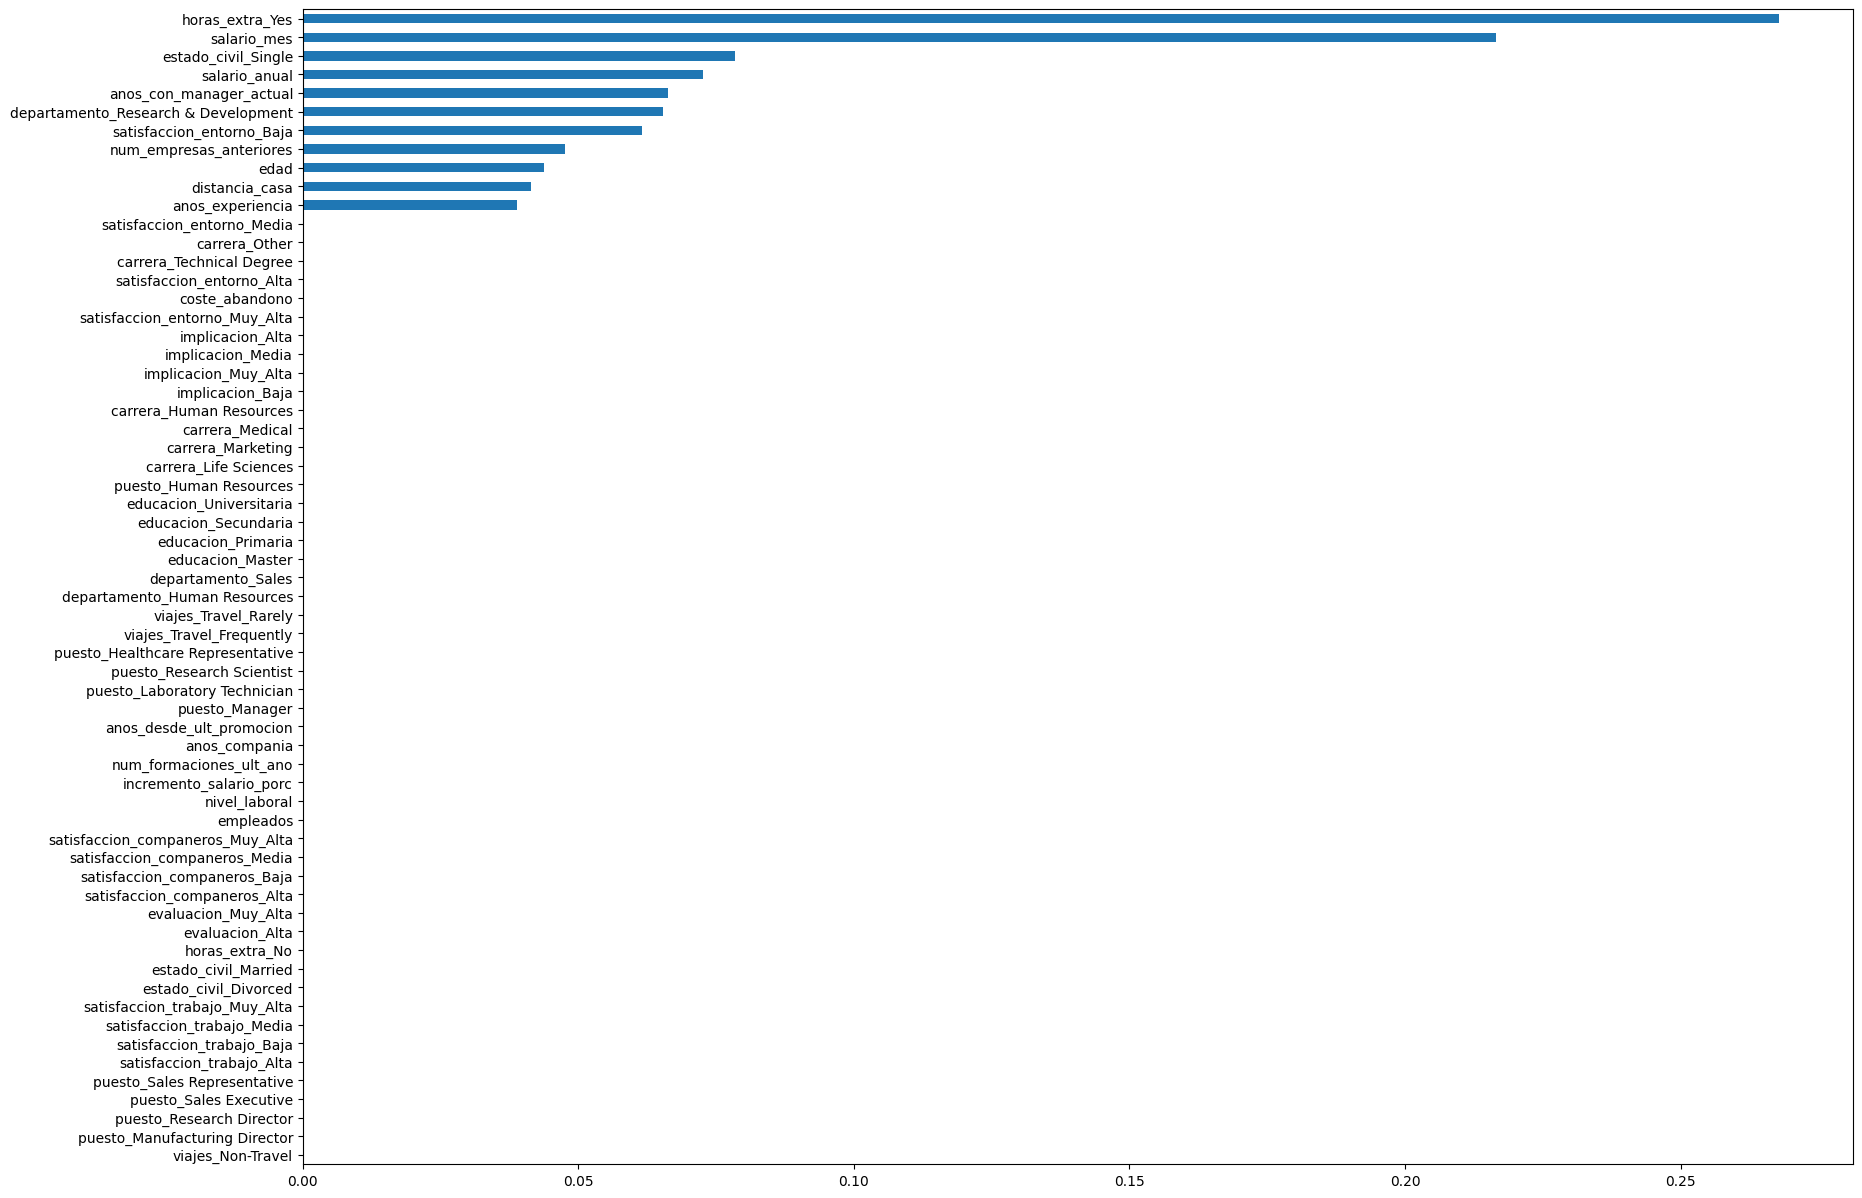

In [43]:
# Variables
variables = pd.Series(ac.feature_importances_,index = test_x.columns)
variables = variables.sort_values(ascending = True)
variables.plot(kind="barh",figsize = (20,15))

In [44]:
# Incorporar
df['prob_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,implicacion,...,evaluacion,satisfaccion_companeros,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,coste_abandono,prob_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,Alta,...,Alta,Baja,8,0,6,0,5,71916,15390.024,0.607143
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,Media,...,Muy_Alta,Muy_Alta,10,3,10,1,7,61560,13173.840,0.034582
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,Media,...,Alta,Media,7,3,0,0,0,25080,5367.120,0.360000
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,Alta,...,Alta,Alta,8,3,8,3,0,34908,7470.312,0.105590
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,Alta,...,Alta,Muy_Alta,6,3,2,2,2,41616,8905.824,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,Muy_Alta,...,Alta,Alta,17,3,5,0,3,30852,6602.328,0.072917
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,Media,...,Alta,Baja,9,5,7,1,7,119892,25656.888,0.034582
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,Muy_Alta,...,Muy_Alta,Media,6,0,6,0,3,73704,15772.656,0.105590


In [45]:
no_abandono = df.loc[df["abandono"]==0]

In [46]:
no_abandono.sort_values(by = 'prob_abandono', ascending = False).head(15)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,implicacion,...,evaluacion,satisfaccion_companeros,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,coste_abandono,prob_abandono
id,,,,,,,,,,,,,,,,,,,,,
1221,36,0,Travel_Rarely,Research & Development,6,Primaria,Life Sciences,1,Alta,Baja,...,Alta,Alta,7,4,7,1,7,32892,7038.888,1.00000
1234,32,0,Travel_Frequently,Research & Development,13,Secundaria,Other,1,Alta,Media,...,Muy_Alta,Alta,2,2,2,2,2,32916,7044.024,1.00000
252,33,0,Travel_Rarely,Research & Development,14,Universitaria,Medical,1,Muy_Alta,Alta,...,Alta,Muy_Alta,8,5,8,1,6,33072,7077.408,1.00000
1244,27,0,Travel_Rarely,Research & Development,14,Universitaria,Life Sciences,1,Baja,Alta,...,Alta,Muy_Alta,9,3,9,6,8,26820,5739.480,0.90625
403,37,0,Travel_Frequently,Research & Development,9,Universitaria,Medical,1,Media,Alta,...,Alta,Alta,4,3,4,1,2,27912,5973.168,0.90625
1292,42,0,Travel_Rarely,Research & Development,7,Universitaria,Medical,1,Media,Muy_Alta,...,Alta,Muy_Alta,18,2,1,0,0,28464,6091.296,0.90625
483,40,0,Travel_Rarely,Research & Development,10,Master,Life Sciences,1,Muy_Alta,Muy_Alta,...,Alta,Alta,10,3,7,1,7,26556,5682.984,0.90625
895,31,0,Travel_Rarely,Research & Development,11,Universitaria,Life Sciences,1,Muy_Alta,Alta,...,Alta,Media,8,2,6,0,2,28272,6050.208,0.90625
205,53,0,Travel_Rarely,Sales,6,Universitaria,Marketing,1,Media,Alta,...,Muy_Alta,Muy_Alta,13,3,7,4,5,27672,5921.808,0.90625


In [47]:
check = df.loc[2020]

In [48]:
print(check)

edad                                            44
abandono                                         0
viajes                               Travel_Rarely
departamento                Research & Development
distancia_casa                                   1
educacion                            Universitaria
carrera                                    Medical
empleados                                        1
satisfaccion_entorno                         Media
implicacion                                   Alta
nivel_laboral                                    1
puesto                          Research Scientist
satisfaccion_trabajo                          Alta
estado_civil                                Single
salario_mes                                   2436
num_empresas_anteriores                          6
horas_extra                                    Yes
incremento_salario_porc                         12
evaluacion                                    Alta
satisfaccion_companeros        

In [49]:
# Pre Power BI
# df.to_csv("rrhh_data_pb.csv")

In [50]:
df["prob_abandono"]

id
1       0.607143
2       0.034582
4       0.360000
5       0.105590
7       0.400000
          ...   
2061    0.072917
2062    0.034582
2064    0.105590
2065    0.034582
2068    0.034582
Name: prob_abandono, Length: 1470, dtype: float64

In [51]:
df["prob_abandono"].mean()

0.16188926163798606